Autora: Estefanía Hurtado Reina

Ingeniería Ambiental

2025

In [1]:
#Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

## <span style="color:Blue;"><strong>Proyecto: Concentración de PM2.5 en Pekín y su relación con otras variables meteorológicas</strong></span>

In [2]:
#Importar datos
drive.mount('/content/drive')

path = '/content/drive/My Drive/'
folder = 'intro_cienciadatos/dataset/'
file = 'PRSA_data_2010.1.1-2014.12.31.csv'

df = pd.read_csv(path + folder + file)
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

Mounted at /content/drive


## <span style="color:Blue;"><strong>1. Introducción</strong></span>

## 1. Presentación del problema o pregunta de investigación

En Beijing, la contaminación atmosférica por material particulado fino (PM₂.₅) es un problema de gran magnitud con implicaciones directas para la salud y el medio ambiente.  
La pregunta central que guiará este análisis es:  

**_“¿Cómo varían los niveles de PM₂.₅ en Beijing en función de condiciones meteorológicas como temperatura, punto de rocío, presión atmosférica, dirección y velocidad del viento, y horas de precipitación sólida o líquida?”_**


## 2. Contexto: ¿por qué es relevante este problema?

- El **PM₂.₅** (partículas con diámetro ≤ 2,5 µm) penetra profundamente en el sistema respiratorio, provocando o agravando enfermedades respiratorias y cardiovasculares.  
- Beijing combina factores de alta emisión (tráfico, industria, uso de carbón en calefacción) con condiciones meteorológicas que pueden favorecer la acumulación de contaminantes.  
- Analizar la influencia de variables climáticas como **temperatura, punto de rocío, presión atmosférica, dirección y velocidad del viento, y horas de precipitación sólida o líquida** permite distinguir variaciones debidas a cambios meteorológicos de aquellas provocadas por modificaciones en las emisiones.  
- Esta distinción es esencial para diseñar **políticas ambientales efectivas** y evaluar el impacto real de medidas temporales (ej. APEC 2014) o estacionales (calefacción invernal).


## 3. Relación entre el problema y la base de datos seleccionada

El dataset incluye mediciones horarias de:

| Variable  | Descripción |
|-----------|-------------|
| **pm2.5** | Concentración de PM₂.₅ (µg/m³) |
| **DEWP**  | Punto de rocío (℃) |
| **TEMP**  | Temperatura (℃) |
| **PRES**  | Presión atmosférica (hPa) |
| **cbwd**  | Dirección combinada del viento |
| **Iws**   | Velocidad acumulada del viento (m/s) |
| **Is**    | Horas acumuladas de nieve |
| **Ir**    | Horas acumuladas de lluvia |

Estas variables permiten:
- Describir la evolución temporal del PM₂.₅.  
- Explorar cómo distintos factores meteorológicos están asociados a cambios en la concentración de partículas.  
- Comparar períodos o eventos específicos controlando por condiciones climáticas, siguiendo metodologías similares a las utilizadas en estudios previos sobre Beijing.



## <span style="color:Blue;"><strong>2. Descripción de la base de datos</strong></span>

<div style="background-color:#FCE4EC; padding:10px; border-radius:8px;">
<b>- Número de registros y variables.</b><br>
<b>- Breve descripción de las variables más importantes.</b><br>
<b>- Tipos de datos (numéricas, categóricas, fechas, texto, etc.).</b>
</div>

In [3]:
#Visualización de la estructura del dataset
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


## <span style="color:Blue;"><strong>3. Análisis inicial de las variables</strong></span>

<div style="background-color:#FCE4EC; padding:10px; border-radius:8px;">
<b>- Identificación de las variables clave.</b><br>
<b>- Conteo de valores, tipos de datos y valores faltantes.</b><br>
</div>

In [4]:
# Número de registros y variables
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")
# Tipos de datos
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())

# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariables categóricas:")
print(categoricas)
# Mostrar los valores únicos de la variable categórica
print("Valores únicos de 'cbwd':")
print(df['cbwd'].unique())
print("*Nota: cv (calm variable) indica condiciones de viento calmadas o estacionarias")

print("\nVariables numéricas:")
print(numericas)

# Descripción general
print("\nDescripción de variables numéricas:")
cols_to_exclude = ['No', 'year', 'month', 'day', 'hour']
print(df[numericas].drop(columns=cols_to_exclude, errors='ignore').describe())

Número de registros: 43824
Número de variables: 14

Tipos de datos por variable:
int64             8
float64           4
object            1
datetime64[ns]    1
Name: count, dtype: int64

Variables categóricas:
['cbwd']
Valores únicos de 'cbwd':
['NW' 'cv' 'NE' 'SE']
*Nota: cv (calm variable) indica condiciones de viento calmadas o estacionarias

Variables numéricas:
['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

Descripción de variables numéricas:
              pm2.5          DEWP          TEMP          PRES           Iws  \
count  41757.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      98.613215      1.817246     12.448521   1016.447654     23.889140   
std       92.050387     14.433440     12.198613     10.268698     50.010635   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       29.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       72.000000      2.0

In [5]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante
porcentaje_pm25 = df['pm2.5'].isna().mean() * 100
print(f"Porcentaje de faltantes: {porcentaje_pm25:.2f}%")


Conteo de valores faltantes por variable:
pm2.5    2067
dtype: int64
Porcentaje de faltantes: 4.72%


In [6]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
No          43824
datetime    43824
Iws          2788
pm2.5         581
DEWP           69
TEMP           64
PRES           60
Ir             37
day            31
Is             28
hour           24
month          12
year            5
cbwd            4
dtype: int64


## <span style="color:Blue;"><strong>4. Visualizaciones exploratorias básicas</strong></span>

<div style="background-color:#FCE4EC; padding:10px; border-radius:8px;">
<b>- Serie de tiempo de la variable principal.</b><br>
<b>- Concentración promedio de PM2.5 por hora del día.</b><br>
<b>- Histogramas de frecuencia.</b><br>
<b>- Boxplots individuales por variable.</b><br>
<b>- Distribución de PM2.5 por dirección del viento combinada.</b><br>
<b>- Mapa de correlaciones entre las variables más importantes.</b><br>
</div>


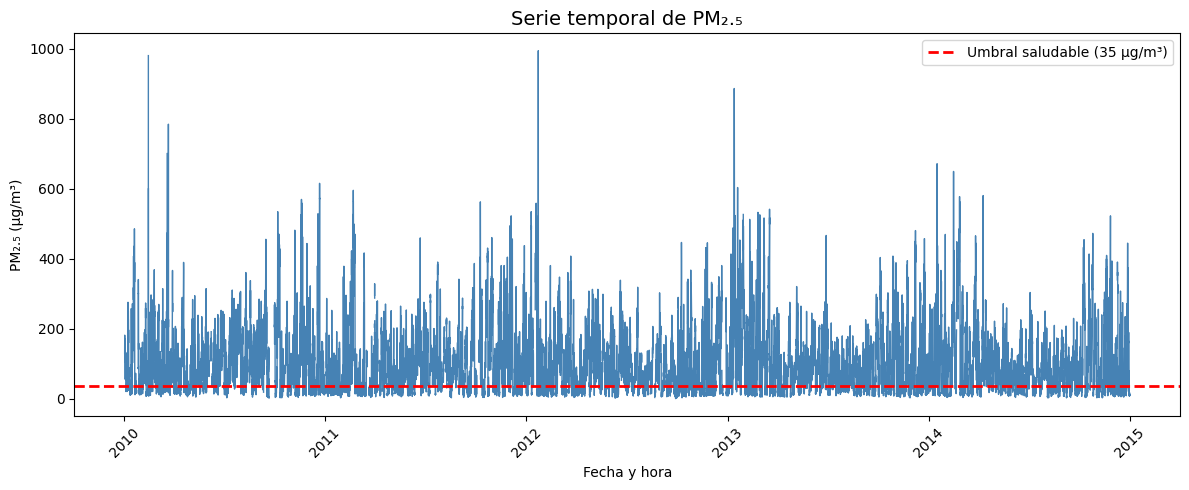

In [7]:
#Serie temporal de pm2.5
plt.figure(figsize=(12, 5))
plt.plot(df['datetime'], df['pm2.5'], color='steelblue', linewidth=1)
plt.axhline(y=35, color='red', linestyle='--', linewidth=2, label='Umbral saludable (35 µg/m³)')

plt.title('Serie temporal de PM₂.₅', fontsize=14)
plt.xlabel('Fecha y hora')
plt.ylabel('PM₂.₅ (µg/m³)')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Promedio por hora del día:
hora
0     113.390202
1     113.698567
2     110.323174
3     108.042980
4     104.080275
5     100.013218
6      96.882759
7      96.024727
8      95.907940
9      94.672800
10     93.447520
11     91.678633
12     89.448873
13     87.990280
14     86.283247
15     85.534215
16     85.922280
17     87.571183
18     91.507710
19     97.398393
20    104.614368
21    109.249856
22    111.021252
23    111.889782
Name: pm2.5, dtype: float64


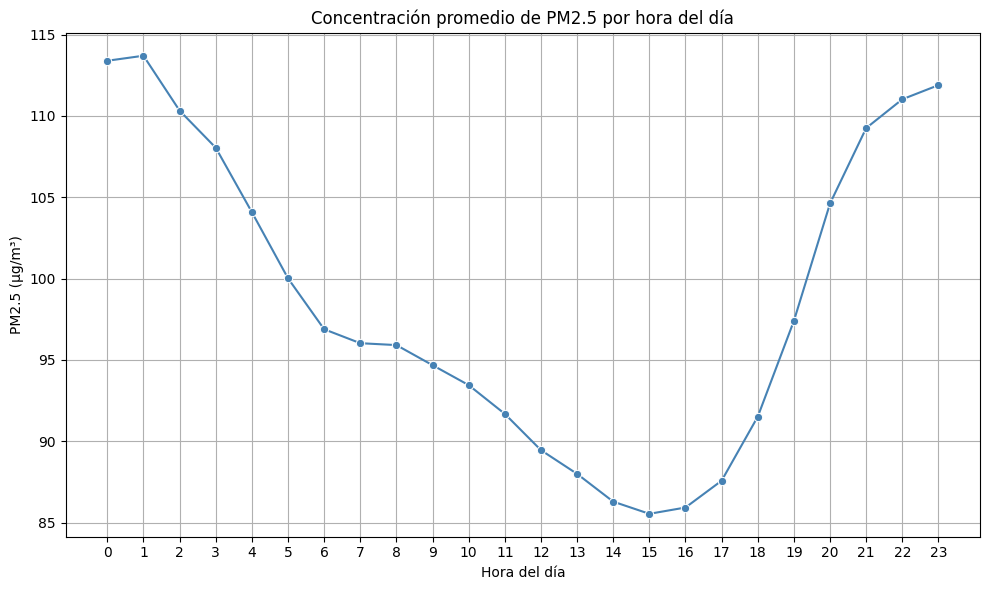

In [8]:
#Promedio por hora del día
df['hora'] = df['datetime'].dt.hour
promedio_hora = df.groupby('hora')['pm2.5'].mean()
print("\nPromedio por hora del día:")
print(promedio_hora)

#Gráfica
plt.figure(figsize=(10, 6))
sns.lineplot(x=promedio_hora.index, y=promedio_hora.values, marker='o', color='steelblue')
plt.title('Concentración promedio de PM2.5 por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

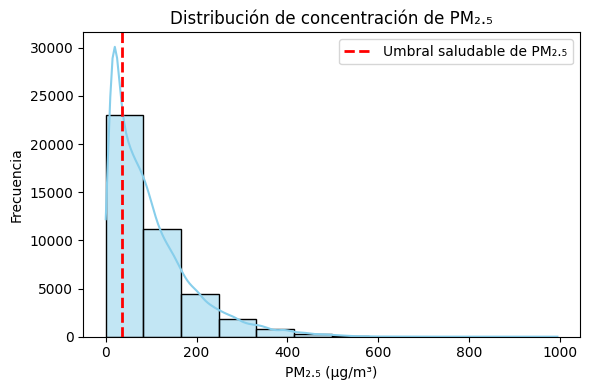

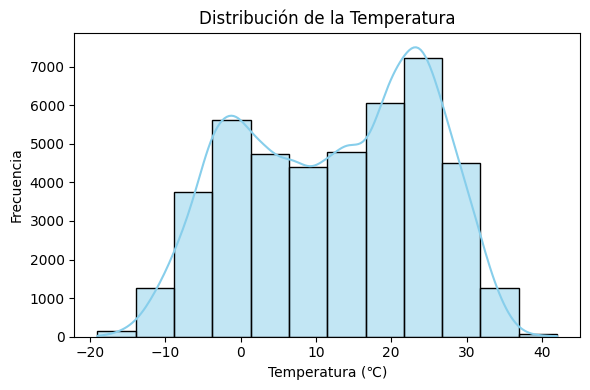

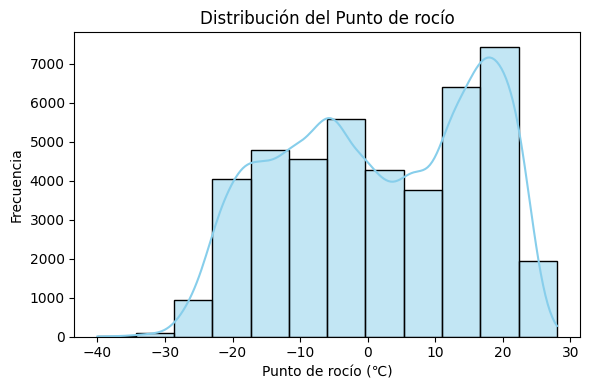

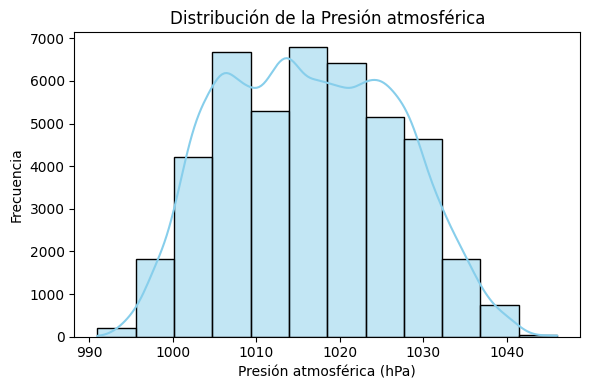

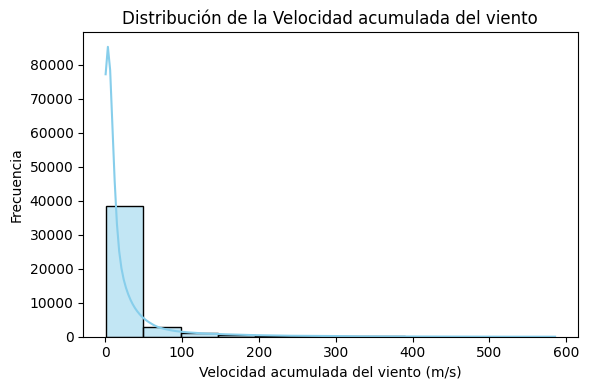

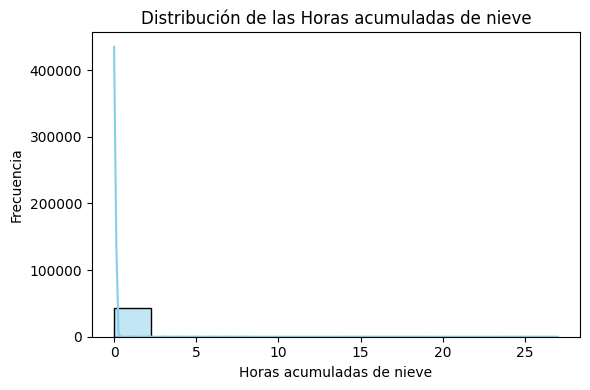

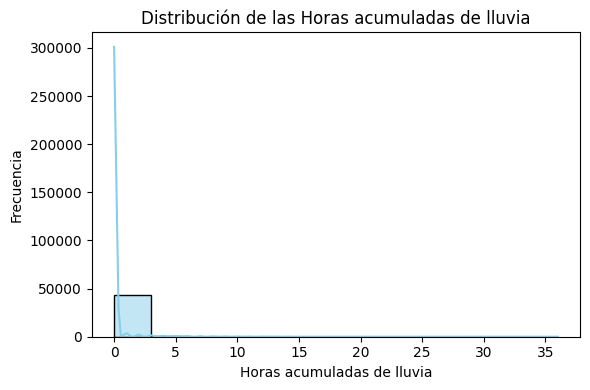

In [9]:
# Histogramas para cada variable
plots = [
    ('pm2.5', 'Distribución de concentración de PM₂.₅', 'PM₂.₅ (µg/m³)'),
    ('TEMP', 'Distribución de la Temperatura', 'Temperatura (℃)'),
    ('DEWP', 'Distribución del Punto de rocío', 'Punto de rocío (℃)'),
    ('PRES', 'Distribución de la Presión atmosférica', 'Presión atmosférica (hPa)'),
    ('Iws', 'Distribución de la Velocidad acumulada del viento', 'Velocidad acumulada del viento (m/s)'),
    ('Is', 'Distribución de las Horas acumuladas de nieve', 'Horas acumuladas de nieve'),
    ('Ir', 'Distribución de las Horas acumuladas de lluvia', 'Horas acumuladas de lluvia')
]

for col, title, xlabel in plots:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=12, kde=True, color='skyblue')

    # Solo para PM2.5 añadimos la línea de referencia
    if col == 'pm2.5':
        plt.axvline(x=35, color='red', linestyle='--', linewidth=2, label='Umbral saludable de PM₂.₅')
        plt.legend()

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

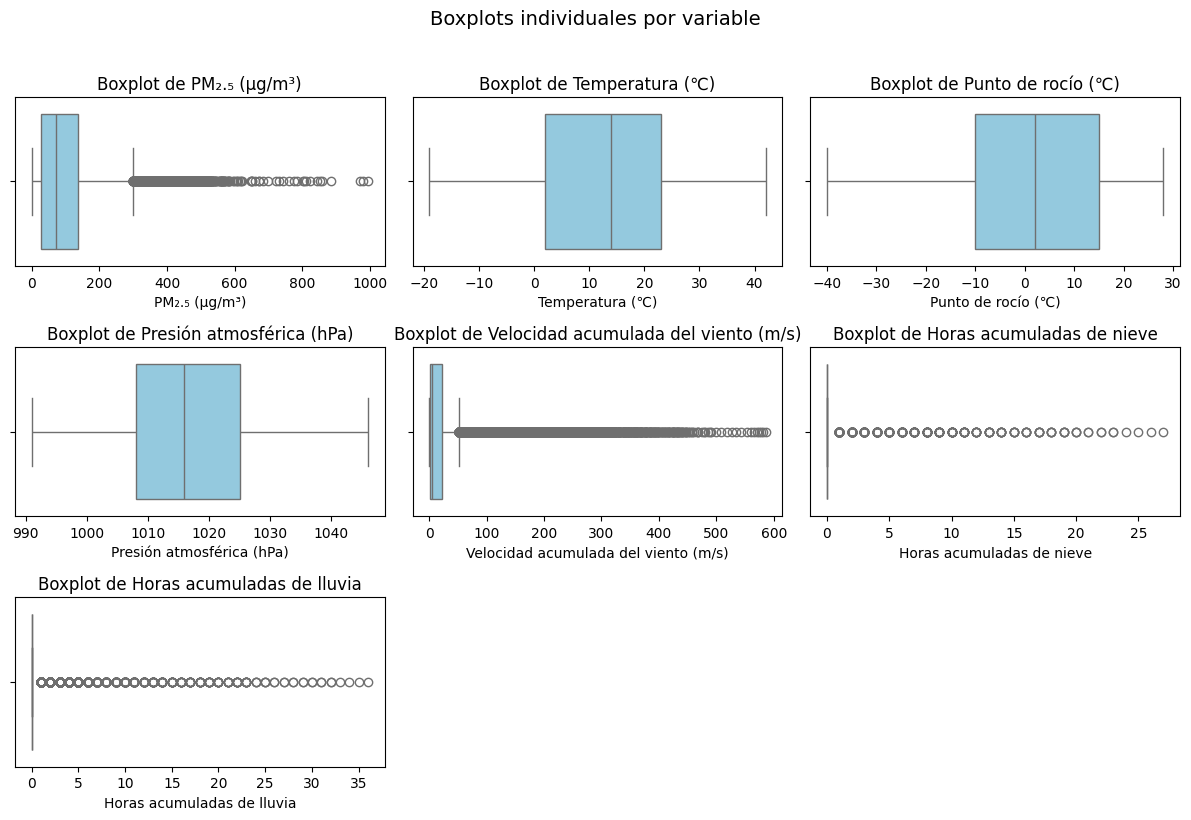

In [10]:
#Boxplots para cada variable
n = len(plots)
ncols = 3
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
axes = axes.flatten()

for i, (col, _, xlabel) in enumerate(plots):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue', showfliers=True)
    axes[i].set_title(f'Boxplot de {xlabel}')
    axes[i].set_xlabel(xlabel)

# Ocultar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Boxplots individuales por variable', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1216502696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cbwd', y='pm2.5', data=df, inner='box', palette='Set2')


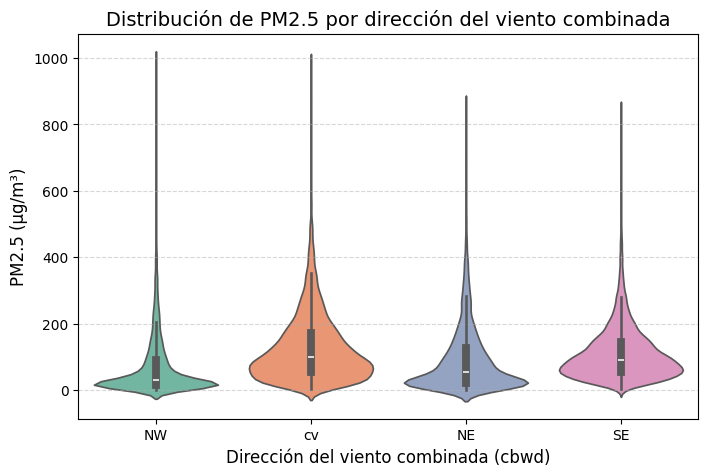

In [11]:
#Diagrama de violín relacionando la distribución de PM2.5 y dirección del viento
plt.figure(figsize=(8, 5))
sns.violinplot(x='cbwd', y='pm2.5', data=df, inner='box', palette='Set2')
plt.title('Distribución de PM2.5 por dirección del viento combinada', fontsize=14)
plt.xlabel('Dirección del viento combinada (cbwd)', fontsize=12)
plt.ylabel('PM2.5 (µg/m³)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


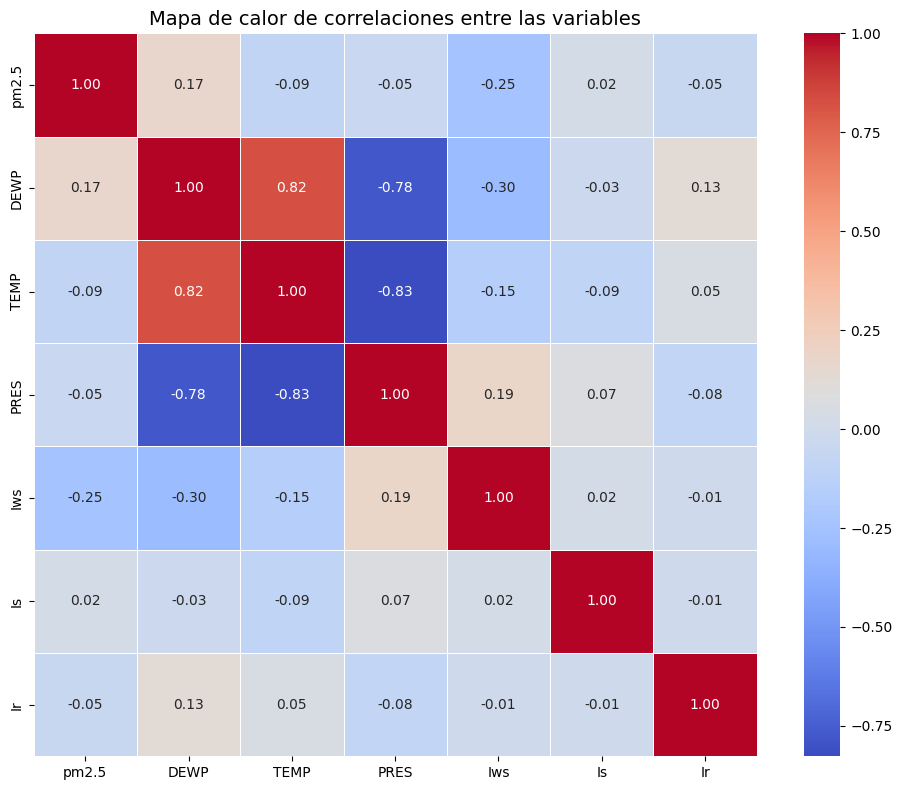

In [12]:
#Mapa de calor

cols_excluir = ['No', 'year', 'month', 'day', 'hour', 'datetime', 'hora'] #Excluir columnas que no son de interés en el análisis
df_filtrado = df.drop(columns=cols_excluir, errors='ignore')
df_num = df_filtrado.select_dtypes(include='number') # Usamos solo las columnas numéricas

corr = df_num.corr() # Calculate correlation only on numerical columns

# Gráfica
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True
)
plt.title('Mapa de calor de correlaciones entre las variables', fontsize=14)
plt.tight_layout()
plt.show()

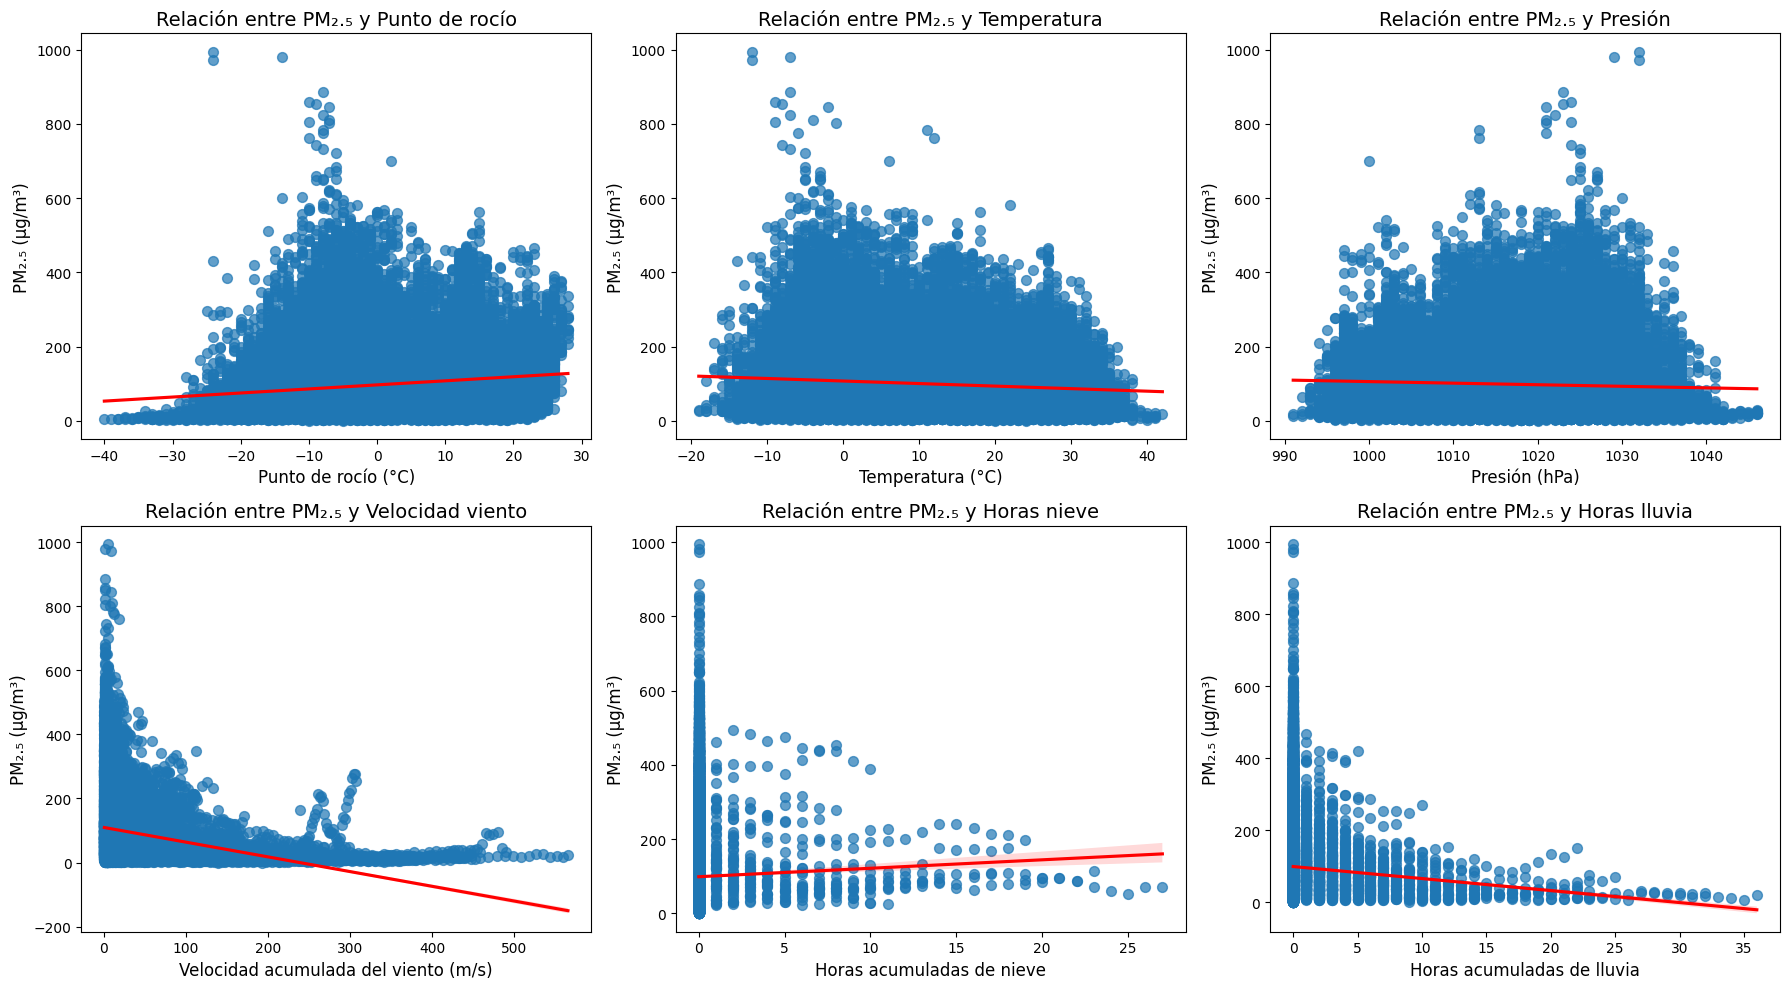

In [13]:
# Configuración: (columna_x, título, etiqueta_x)
plots = [
    ('DEWP', 'Relación entre PM₂.₅ y Punto de rocío', 'Punto de rocío (°C)'),
    ('TEMP', 'Relación entre PM₂.₅ y Temperatura',    'Temperatura (°C)'),
    ('PRES', 'Relación entre PM₂.₅ y Presión',        'Presión (hPa)'),
    ('Iws',  'Relación entre PM₂.₅ y Velocidad viento', 'Velocidad acumulada del viento (m/s)'),
    ('Is',   'Relación entre PM₂.₅ y Horas nieve',    'Horas acumuladas de nieve'),
    ('Ir',   'Relación entre PM₂.₅ y Horas lluvia',   'Horas acumuladas de lluvia')
]

# Crear figura: 2 filas x 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, (col_x, title, xlabel) in zip(axes, plots):
    sns.regplot(
        x=col_x, y='pm2.5', data=df, ax=ax,
        scatter_kws={'s': 50, 'alpha': 0.7},
        line_kws={'color': 'red'}  # Color único para todas
    )
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('PM₂.₅ (µg/m³)', fontsize=12)

# Ocultar ejes sobrantes si hubiera
for j in range(len(plots), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## <span style="color:Blue;"><strong>5. Interpretaciones iniciales</strong></span>

<div style="background-color:#E6F4FF; padding:10px; border-radius:8px;">
<b>¿Qué tendencias o patrones básicos se observan?</b>  
<ul>
  <li>La concentración de PM2.5 oscila normalmente entre valores cercanos a 0 y cercanos a 400 µg/m³ </li>
  <li>La concentración de PM2.5 parece ser mayor entre las 21:00 PM y 2:00 AM </li>
  <li> Los valores más frecuentes de PM2.5 son entre 0 y menos de 100 µg/m³ </li>
  <li>Ninguna de las variables parece seguir una distribución normal</li>
  <li>Los valores de PM2.5, velocidad acumulada del viento, horas acumuladas de nueve y horas acumuladas de lluvia, presentan gran cantidad de valores atípicos. </li>
  <li>La gráfica de violín que relaciona PM2.5 con la dirección del viento, sugiere que condiciones de viento calmadas presenta una distribución más amplia </li>
  
</ul>
</div>

<br>

<div style="background-color:#E8F5E9; padding:10px; border-radius:8px;">
<b>¿Qué limitaciones tiene la base de datos?</b>  
<ul>
  <li>Faltan otras relevantes como humedad relativa, radiación solar, cobertura de nubes, o estabilidad atmosférica.</li>
  <li>La dirección del viento está simplificada, el uso de esta variable de forma categórica odría ocultar información importante</li>
  <li>La base no contiene información sobre emisiones primarias (vehículos, fábricas, etc.), lo que limita el análisis de causa y puede sesgar los resultados.</li>
  <li>No hay validación con otras estaciones o fuentes satelitales</li>

</ul>
</div>

<br>

<div style="background-color:#FFF9C4; padding:10px; border-radius:8px;">
<b>¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?</b>  
<ul>
  <li>Los días con viento en calma o sin dirección definida pueden presentar tendencia a acumular más contaminantes.</li>
  <li>Relación de PM2.5 con otras variables: parece existir una correlacion negativa modeerada con la velocidad del viento, una correlación positiva débil con el punto de rocío y correlaciones muy débiles o nulas con los valores de Temperatura, Precipitación, Horas de nieve/lluvia acumuladas</li>
  
</ul>
</div>


## <span style="color:Blue;"><strong>6. Conclusiones</strong></span>

<div style="background-color:#FCE4EC; padding:10px; border-radius:8px;">
<b>- Resumen de los principales hallazgos iniciales.</b><br>
<b>- Reflexión sobre cómo este entregable contribuye al desarrollo del proyecto completo.</b><br>
</div>


- La **velocidad del viento ** muestra una **correlación negativa moderada** con PM2.5, lo que sugiere una posible influencia en la dispersión de contaminantes
- Las **visualizaciones exploratorias** revelaron patrones relevantes:
  -PM2.5 suele estar entre 0 y 400 µg/m³, con valores más frecuentes bajo 100.
  -Se observan picos nocturnos entre las 21:00 y 2:00 AM.
  -Las variables no siguen distribución normal y presentan varios outliers.

Este entregable representa un primer paso sólido en la exploración científica del comportamiento de PM2.5 en relación con variables meteorológicas. Al identificar patrones básicos, limitaciones estructurales y posibles hipótesis, se establece una base conceptual y metodológica para avanzar hacia análisis más profundos.

## <span style="color:Blue;"><strong>7. Referencias</strong></span>

<div style="background-color:#FCE4EC; padding:10px; border-radius:8px;">
<b>- Fuente(s) de los datos.</b><br>
<b>- Cualquier referencia bibliográfica o técnica utilizada.</b><br>
</div>

### **Fuente de los datos**
- Dataset: **Student Performance Data Set**
  **Repositorio:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance).  
  **Autores:** Song Chen.
  **Descripción:** Este conjunto de datos horarios contiene los datos de PM2.5 de la Embajada de EE. UU. en Pekín. También incluye datos meteorológicos del Aeropuerto Internacional de Pekín-Capital.
-Paper Introductorio: Liang, X., Zou, T., Guo, B., Li, S., Zhang, H., Zhang, S., ... & Chen, S. X. (2015). Assessing Beijing's PM2. 5 pollution: severity, weather impact, APEC and winter heating. Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences, 471(2182), 20150257.